# Lumos5G Dataset Exploration

## Overview
Exploring the Lumos5G v1.0 dataset - Commercial mmWave 5G throughput measurements collected in Minneapolis downtown area.

## Dataset Information
- **Source**: IMC'20 Paper - "Lumos5G: Mapping and Predicting Commercial mmWave 5G Throughput"
- **Location**: Loop area near U.S. Bank Stadium, Minneapolis
- **Coverage**: 1300 meter loop (roads, crossings, restaurants, parks)
- **Measurements**: Per-second TCP downlink throughput via iPerf 3.7
- **Signal Metrics**: RSRP, RSRQ, SINR for both LTE and 5G-NR

## Key Metrics Available
1. **Throughput**: TCP downlink (Mbps)
2. **Signal Strength**: 5G-NR and LTE measurements
3. **Mobility**: Walking vs Driving
4. **Location**: GPS coordinates (latitude, longitude)
5. **Network Status**: 5G connected vs LTE fallback

## Research Questions
1. How does signal strength correlate with throughput in 5G?
2. Does mobility mode affect performance?
3. Can we predict throughput from signal metrics?
4. How does this compare to M-Lab wired data?

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Create directories
Path('../data/processed').mkdir(parents=True, exist_ok=True)
Path('../results/figures').mkdir(parents=True, exist_ok=True)

print("✓ Libraries imported")

✓ Libraries imported


## Load Lumos5G Dataset

In [2]:
# Load dataset
lumos_file = '../../Lumos5G-v1.0/Lumos5G-v1.0.csv'

print("Loading Lumos5G dataset...")
df = pd.read_csv(lumos_file)

print(f"✓ Loaded {len(df):,} measurements")
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

Loading Lumos5G dataset...
✓ Loaded 68,118 measurements

Dataset shape: (68118, 19)
Columns: 19

Column names:
   1. run_num
   2. seq_num
   3. abstractSignalStr
   4. latitude
   5. longitude
   6. movingSpeed
   7. compassDirection
   8. nrStatus
   9. lte_rssi
  10. lte_rsrp
  11. lte_rsrq
  12. lte_rssnr
  13. nr_ssRsrp
  14. nr_ssRsrq
  15. nr_ssSinr
  16. Throughput
  17. mobility_mode
  18. trajectory_direction
  19. tower_id


## Initial Data Exploration

In [3]:
# First few rows
print("First 10 rows:")
display(df.head(10))

First 10 rows:


,run_num,seq_num,abstractSignalStr,latitude,longitude,movingSpeed,compassDirection,nrStatus,lte_rssi,lte_rsrp,lte_rsrq,lte_rssnr,nr_ssRsrp,nr_ssRsrq,nr_ssSinr,Throughput,mobility_mode,trajectory_direction,tower_id
0,1,1.0,2,44.975314,-93.259316,0.094889,150,NOT_RESTRICTED,-61.0,-94,-14.0,2.147484e+09,NaN,NaN,NaN,78,driving,CW,16
1,1,2.0,2,44.975311,-93.259311,0.876634,117,NOT_RESTRICTED,-61.0,-94,-14.0,2.147484e+09,NaN,NaN,NaN,117,driving,CW,16
2,1,3.0,2,44.975305,-93.259292,2.225798,113,NOT_RESTRICTED,-61.0,-94,-14.0,2.147484e+09,NaN,NaN,NaN,110,driving,CW,16
3,1,4.0,2,44.975293,-93.259258,3.180726,114,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,108,driving,CW,16
4,1,5.0,2,44.975278,-93.259214,3.751234,115,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,100,driving,CW,16
5,1,6.0,2,44.975259,-93.259166,4.083331,118,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,124,driving,CW,16
6,1,7.0,2,44.975237,-93.259119,4.130768,124,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,109,driving,CW,16
7,1,8.0,2,44.975211,-93.259078,4.107023,135,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,108,driving,CW,16
8,1,9.0,2,44.975181,-93.259047,3.977770,155,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,87,driving,CW,16
9,1,10.0,2,44.975147,-93.259035,3.679054,179,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,116,driving,CW,16


In [4]:
# Basic statistics
print("Dataset Statistics:")
print("=" * 80)
display(df.describe())

Dataset Statistics:


,run_num,seq_num,abstractSignalStr,latitude,longitude,movingSpeed,compassDirection,lte_rssi,lte_rsrp,lte_rsrq,lte_rssnr,nr_ssRsrp,nr_ssRsrq,nr_ssSinr,Throughput,tower_id
count,68118.000000,68118.000000,68118.000000,68118.000000,68118.000000,6.811800e+04,68118.000000,65137.000000,68118.000000,65137.000000,6.513700e+04,51990.000000,5.199000e+04,51990.000000,68118.000000,68118.000000
mean,57.913635,351.161910,3.934628,44.975189,-93.261352,1.862048e+00,177.688731,-55.456054,-83.705849,-12.571626,2.147484e+09,-89.070917,3.696859e+07,11.653530,520.665184,13.522681
std,34.313850,233.902358,0.927087,0.000987,0.001205,1.857597e+00,101.751416,7.799077,18.040661,3.498149,0.000000e+00,8.366524,2.793283e+08,6.323822,461.941862,5.694595
min,1.000000,1.000000,1.000000,44.973256,-93.263754,6.212357e-12,0.000000,-79.000000,-140.000000,-20.000000,2.147484e+09,-139.000000,-2.000000e+01,-20.000000,0.000000,1.000000
25%,28.000000,145.000000,3.000000,44.974377,-93.262263,1.236203e+00,114.000000,-57.000000,-90.000000,-15.000000,2.147484e+09,-94.000000,-1.200000e+01,8.000000,109.000000,11.000000
50%,53.000000,318.000000,4.000000,44.975318,-93.261321,1.354527e+00,184.000000,-51.000000,-79.000000,-12.000000,2.147484e+09,-89.000000,-1.200000e+01,14.000000,424.000000,16.000000
75%,88.000000,555.000000,5.000000,44.975978,-93.260409,1.464417e+00,295.000000,-51.000000,-75.000000,-10.000000,2.147484e+09,-83.000000,-1.200000e+01,17.000000,867.000000,16.000000
max,118.000000,800.000000,5.000000,44.976964,-93.258991,1.405988e+01,360.000000,-51.000000,-44.000000,-5.000000,2.147484e+09,-68.000000,2.147484e+09,30.000000,1920.000000,24.000000


In [5]:
# Data types and missing values
print("Data Types:")
print(df.dtypes)

print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Data Types:
run_num                   int64
seq_num                 float64
abstractSignalStr         int64
latitude                float64
longitude               float64
movingSpeed             float64
compassDirection          int64
nrStatus                 object
lte_rssi                float64
lte_rsrp                  int64
lte_rsrq                float64
lte_rssnr               float64
nr_ssRsrp               float64
nr_ssRsrq               float64
nr_ssSinr               float64
Throughput                int64
mobility_mode            object
trajectory_direction     object
tower_id                  int64
dtype: object

Missing Values:
           Missing Count  Percentage
nr_ssRsrp          16128   23.676561
nr_ssRsrq          16128   23.676561
nr_ssSinr          16128   23.676561
lte_rssi            2981    4.376229
lte_rsrq            2981    4.376229
lte_rssnr           2981    4.376229


## Network Status Analysis

In [6]:
# 5G connectivity status
print("Network Status Distribution:")
print("=" * 50)
print(df['nrStatus'].value_counts())
print(f"\n5G Connection Rate: {(df['nrStatus'] == 'CONNECTED').sum() / len(df) * 100:.1f}%")

# Mobility mode
print("\nMobility Mode Distribution:")
print("=" * 50)
print(df['mobility_mode'].value_counts())

# Trajectory direction
print("\nTrajectory Direction:")
print("=" * 50)
print(df['trajectory_direction'].value_counts())

Network Status Distribution:
nrStatus
CONNECTED         52374
NOT_RESTRICTED    15667
NONE                 77
Name: count, dtype: int64

5G Connection Rate: 76.9%

Mobility Mode Distribution:
mobility_mode
walking    56935
driving    11183
Name: count, dtype: int64

Trajectory Direction:
trajectory_direction
CW     38021
ACW    30097
Name: count, dtype: int64


## Throughput Analysis

In [7]:
# Throughput statistics
print("Throughput Statistics:")
print("=" * 50)
print(f"Mean: {df['Throughput'].mean():.2f} Mbps")
print(f"Median: {df['Throughput'].median():.2f} Mbps")
print(f"Std Dev: {df['Throughput'].std():.2f} Mbps")
print(f"Min: {df['Throughput'].min():.2f} Mbps")
print(f"Max: {df['Throughput'].max():.2f} Mbps")
print(f"\n25th percentile: {df['Throughput'].quantile(0.25):.2f} Mbps")
print(f"75th percentile: {df['Throughput'].quantile(0.75):.2f} Mbps")
print(f"95th percentile: {df['Throughput'].quantile(0.95):.2f} Mbps")

# Throughput by network status
print("\nThroughput by Network Status:")
print("=" * 50)
throughput_by_status = df.groupby('nrStatus')['Throughput'].agg(['count', 'mean', 'median', 'std'])
display(throughput_by_status)

# Throughput by mobility mode
print("\nThroughput by Mobility Mode:")
print("=" * 50)
throughput_by_mobility = df.groupby('mobility_mode')['Throughput'].agg(['count', 'mean', 'median', 'std'])
display(throughput_by_mobility)

Throughput Statistics:
Mean: 520.67 Mbps
Median: 424.00 Mbps
Std Dev: 461.94 Mbps
Min: 0.00 Mbps
Max: 1920.00 Mbps

25th percentile: 109.00 Mbps
75th percentile: 867.00 Mbps
95th percentile: 1390.00 Mbps

Throughput by Network Status:


,count,mean,median,std
nrStatus,,,,
CONNECTED,52374,641.189712,645.0,461.271598
NONE,77,116.987013,98.0,67.816217
NOT_RESTRICTED,15667,119.741686,111.0,79.905787



Throughput by Mobility Mode:


,count,mean,median,std
mobility_mode,,,,
driving,11183,343.292676,124.0,372.912891
walking,56935,555.504154,505.0,469.679212


## Signal Strength Analysis

In [8]:
# 5G signal metrics (when connected)
df_5g = df[df['nrStatus'] == 'CONNECTED'].copy()

print(f"5G Connected Measurements: {len(df_5g):,} ({len(df_5g)/len(df)*100:.1f}%)")
print("\n5G Signal Strength Metrics:")
print("=" * 50)

if len(df_5g) > 0:
    print("\nNR SS-RSRP (Reference Signal Received Power):")
    print(f"  Mean: {df_5g['nr_ssRsrp'].mean():.2f} dBm")
    print(f"  Range: {df_5g['nr_ssRsrp'].min():.2f} to {df_5g['nr_ssRsrp'].max():.2f} dBm")
    
    print("\nNR SS-RSRQ (Reference Signal Received Quality):")
    print(f"  Mean: {df_5g['nr_ssRsrq'].mean():.2f} dB")
    print(f"  Range: {df_5g['nr_ssRsrq'].min():.2f} to {df_5g['nr_ssRsrq'].max():.2f} dB")
    
    print("\nNR SS-SINR (Signal-to-Interference-plus-Noise Ratio):")
    print(f"  Mean: {df_5g['nr_ssSinr'].mean():.2f} dB")
    print(f"  Range: {df_5g['nr_ssSinr'].min():.2f} to {df_5g['nr_ssSinr'].max():.2f} dB")
else:
    print("No 5G connected measurements found")

5G Connected Measurements: 52,374 (76.9%)

5G Signal Strength Metrics:

NR SS-RSRP (Reference Signal Received Power):
  Mean: -89.07 dBm
  Range: -139.00 to -68.00 dBm

NR SS-RSRQ (Reference Signal Received Quality):
  Mean: 36970727.98 dB
  Range: -20.00 to 2147483647.00 dB

NR SS-SINR (Signal-to-Interference-plus-Noise Ratio):
  Mean: 11.65 dB
  Range: -20.00 to 30.00 dB


## Correlation Analysis: Signal Metrics vs Throughput

Correlation with Throughput (5G Connected):
  nr_ssRsrp           : +0.487
  nr_ssRsrq           : -0.158
  nr_ssSinr           : +0.475
  movingSpeed         : -0.212

Full Correlation Matrix:


,Throughput,nr_ssRsrp,nr_ssRsrq,nr_ssSinr,movingSpeed
Throughput,1.000000,0.487323,-0.158043,0.475117,-0.212209
nr_ssRsrp,0.487323,1.000000,-0.259818,0.784961,-0.212344
nr_ssRsrq,-0.158043,-0.259818,1.000000,-0.378741,0.083870
nr_ssSinr,0.475117,0.784961,-0.378741,1.000000,-0.134262
movingSpeed,-0.212209,-0.212344,0.083870,-0.134262,1.000000



✓ Correlation heatmap saved


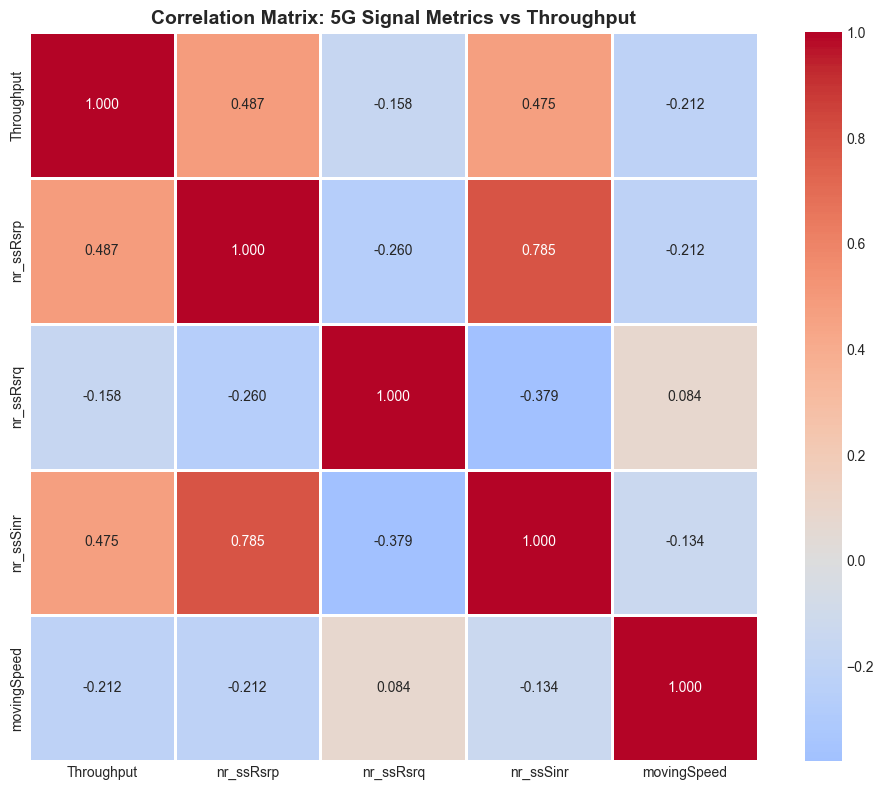

In [9]:
# Calculate correlations for 5G connected measurements
if len(df_5g) > 0:
    print("Correlation with Throughput (5G Connected):")
    print("=" * 50)
    
    signal_cols = ['nr_ssRsrp', 'nr_ssRsrq', 'nr_ssSinr', 'movingSpeed']
    
    for col in signal_cols:
        if col in df_5g.columns:
            corr = df_5g[col].corr(df_5g['Throughput'])
            print(f"  {col:20s}: {corr:+.3f}")
    
    # Full correlation matrix
    print("\nFull Correlation Matrix:")
    corr_cols = ['Throughput', 'nr_ssRsrp', 'nr_ssRsrq', 'nr_ssSinr', 'movingSpeed']
    corr_matrix = df_5g[corr_cols].corr()
    display(corr_matrix)
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, linewidths=1)
    plt.title('Correlation Matrix: 5G Signal Metrics vs Throughput', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../results/figures/lumos5g_correlation_matrix.png', dpi=300, bbox_inches='tight')
    print("\n✓ Correlation heatmap saved")
    plt.show()

## Visualizations

✓ Comprehensive visualization saved


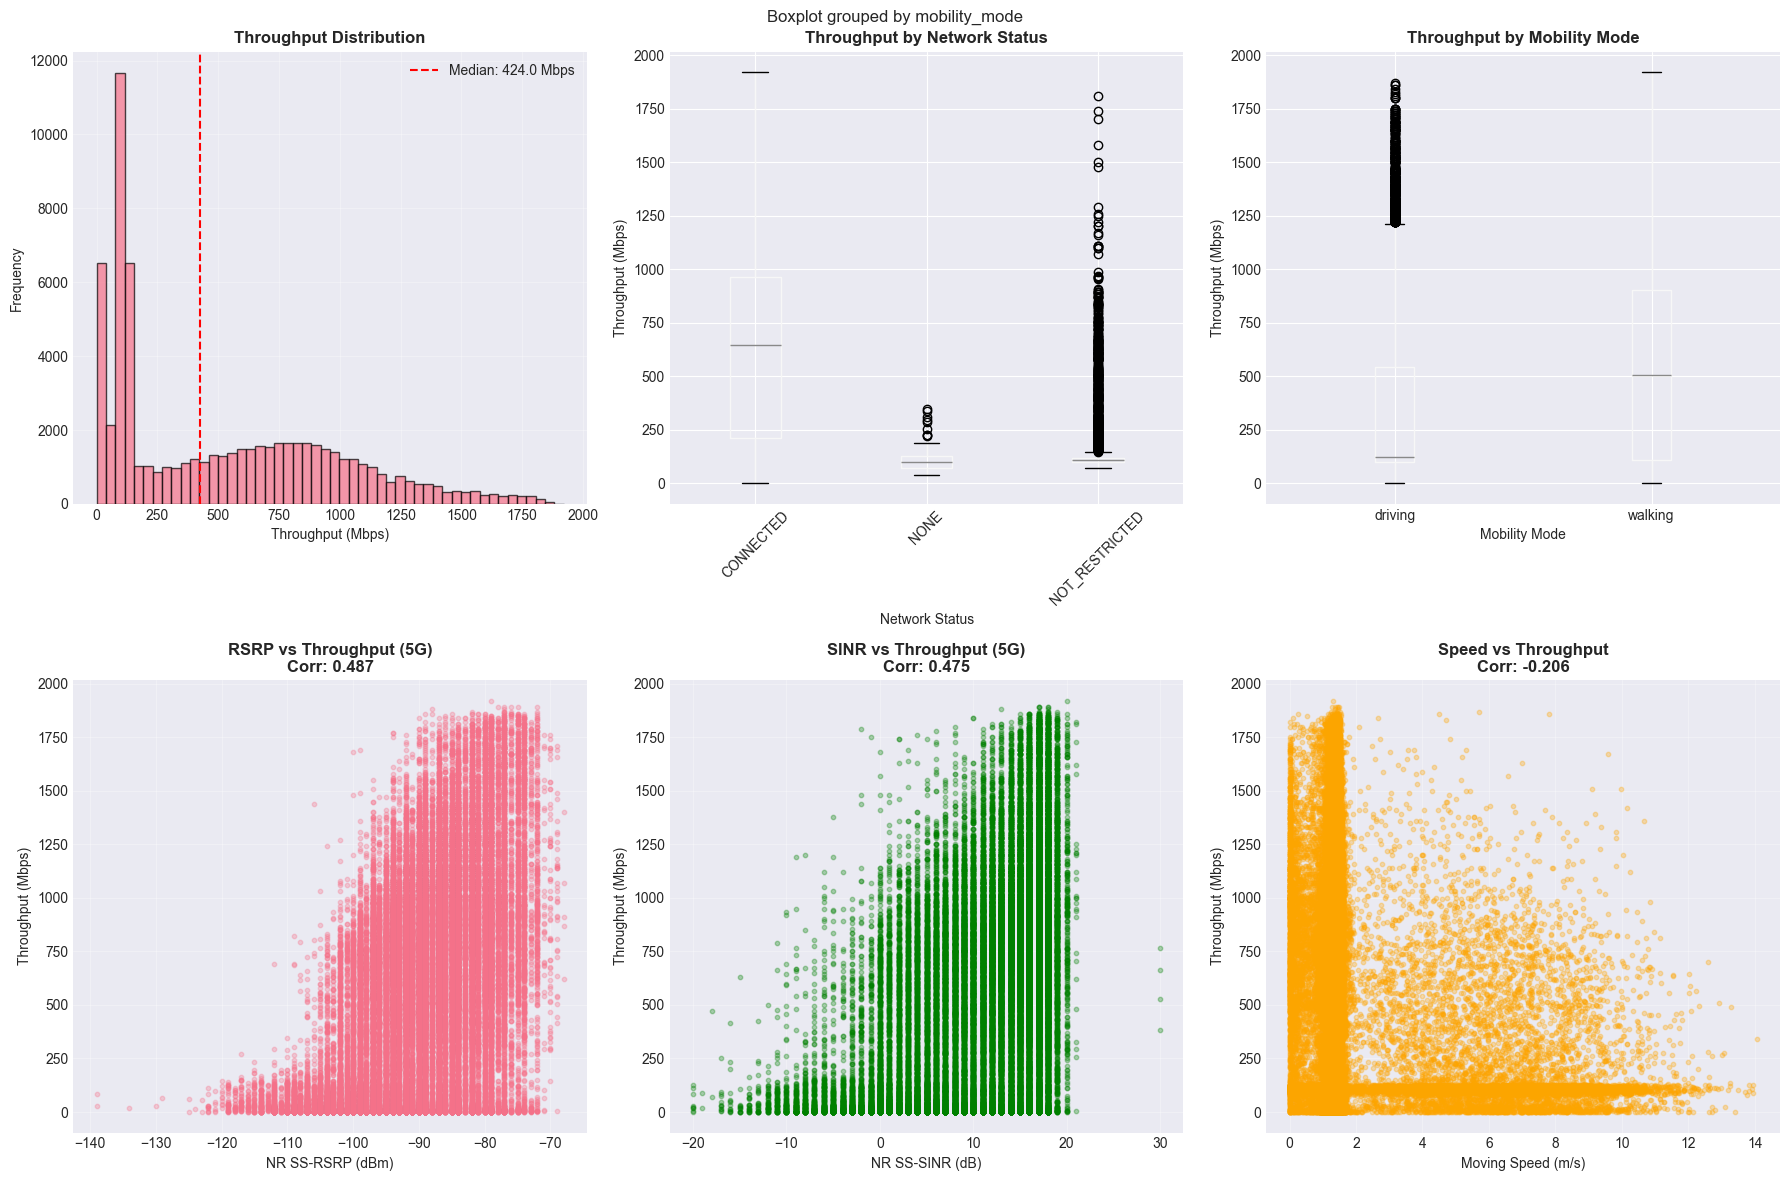

In [10]:
# Comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Throughput distribution
axes[0, 0].hist(df['Throughput'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Throughput'].median(), color='red', linestyle='--', 
                   label=f'Median: {df["Throughput"].median():.1f} Mbps')
axes[0, 0].set_xlabel('Throughput (Mbps)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Throughput Distribution', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Throughput by network status
df.boxplot(column='Throughput', by='nrStatus', ax=axes[0, 1])
axes[0, 1].set_xlabel('Network Status')
axes[0, 1].set_ylabel('Throughput (Mbps)')
axes[0, 1].set_title('Throughput by Network Status', fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# 3. Throughput by mobility mode
df.boxplot(column='Throughput', by='mobility_mode', ax=axes[0, 2])
axes[0, 2].set_xlabel('Mobility Mode')
axes[0, 2].set_ylabel('Throughput (Mbps)')
axes[0, 2].set_title('Throughput by Mobility Mode', fontweight='bold')

# 4. Signal strength vs throughput (5G)
if len(df_5g) > 0:
    axes[1, 0].scatter(df_5g['nr_ssRsrp'], df_5g['Throughput'], alpha=0.3, s=10)
    axes[1, 0].set_xlabel('NR SS-RSRP (dBm)')
    axes[1, 0].set_ylabel('Throughput (Mbps)')
    axes[1, 0].set_title(f'RSRP vs Throughput (5G)\nCorr: {df_5g["nr_ssRsrp"].corr(df_5g["Throughput"]):.3f}', 
                        fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

# 5. SINR vs throughput (5G)
if len(df_5g) > 0:
    axes[1, 1].scatter(df_5g['nr_ssSinr'], df_5g['Throughput'], alpha=0.3, s=10, color='green')
    axes[1, 1].set_xlabel('NR SS-SINR (dB)')
    axes[1, 1].set_ylabel('Throughput (Mbps)')
    axes[1, 1].set_title(f'SINR vs Throughput (5G)\nCorr: {df_5g["nr_ssSinr"].corr(df_5g["Throughput"]):.3f}', 
                        fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

# 6. Moving speed vs throughput
axes[1, 2].scatter(df['movingSpeed'], df['Throughput'], alpha=0.3, s=10, color='orange')
axes[1, 2].set_xlabel('Moving Speed (m/s)')
axes[1, 2].set_ylabel('Throughput (Mbps)')
axes[1, 2].set_title(f'Speed vs Throughput\nCorr: {df["movingSpeed"].corr(df["Throughput"]):.3f}', 
                    fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/lumos5g_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Comprehensive visualization saved")
plt.show()

## Geographic Analysis

✓ Geographic visualization saved


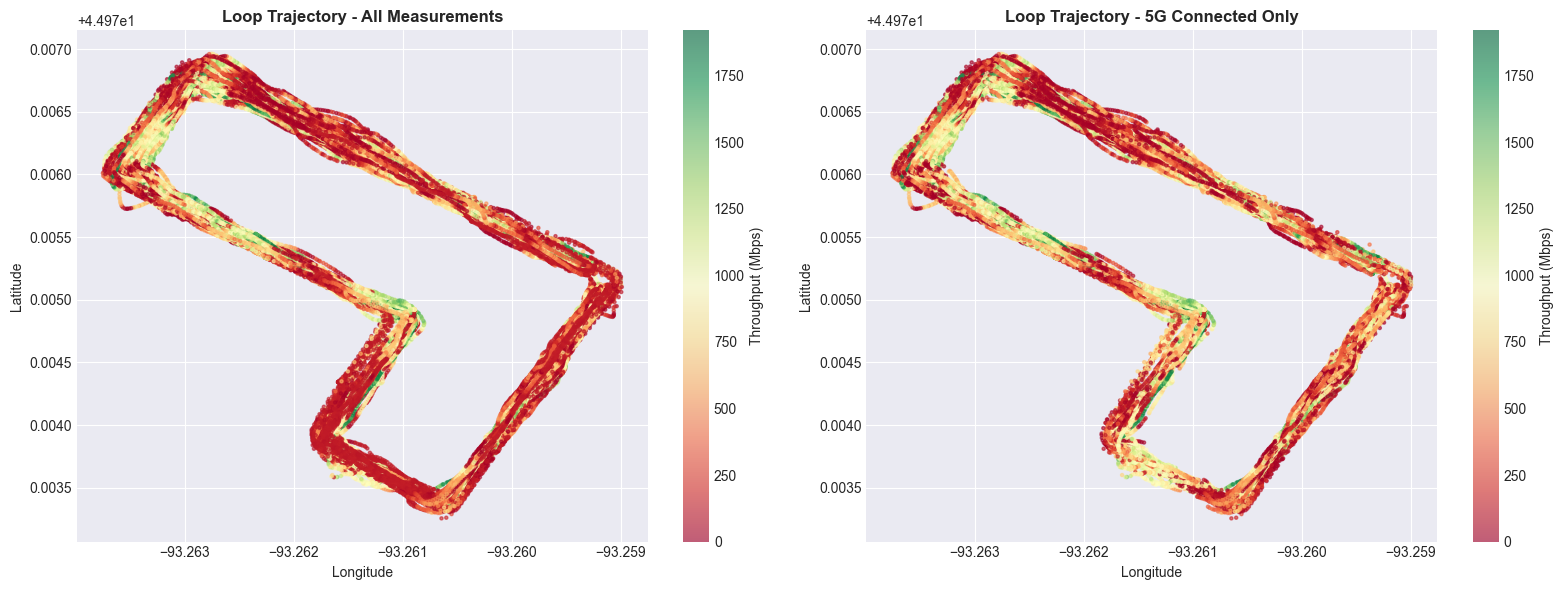

In [11]:
# Plot trajectory with throughput overlay
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All measurements
scatter1 = axes[0].scatter(df['longitude'], df['latitude'], 
                          c=df['Throughput'], cmap='RdYlGn', s=5, alpha=0.6)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Loop Trajectory - All Measurements', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Throughput (Mbps)')

# 5G connected only
if len(df_5g) > 0:
    scatter2 = axes[1].scatter(df_5g['longitude'], df_5g['latitude'], 
                              c=df_5g['Throughput'], cmap='RdYlGn', s=5, alpha=0.6)
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].set_title('Loop Trajectory - 5G Connected Only', fontweight='bold')
    plt.colorbar(scatter2, ax=axes[1], label='Throughput (Mbps)')

plt.tight_layout()
plt.savefig('../results/figures/lumos5g_geographic_throughput.png', dpi=300, bbox_inches='tight')
print("✓ Geographic visualization saved")
plt.show()

## Key Findings

In [12]:
# Summary statistics
print("="*80)
print("LUMOS5G KEY FINDINGS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   • Total measurements: {len(df):,}")
print(f"   • 5G connectivity: {(df['nrStatus']=='CONNECTED').sum()/len(df)*100:.1f}%")
print(f"   • Average throughput: {df['Throughput'].mean():.1f} Mbps")
print(f"   • Median throughput: {df['Throughput'].median():.1f} Mbps")

print("\n2. THROUGHPUT COMPARISON:")
if len(df_5g) > 0 and len(df[df['nrStatus']!='CONNECTED']) > 0:
    non_5g = df[df['nrStatus']!='CONNECTED']
    print(f"   • 5G connected: {df_5g['Throughput'].mean():.1f} Mbps (avg)")
    print(f"   • Non-5G: {non_5g['Throughput'].mean():.1f} Mbps (avg)")
    improvement = ((df_5g['Throughput'].mean() - non_5g['Throughput'].mean()) / non_5g['Throughput'].mean()) * 100
    print(f"   • 5G improvement: {improvement:+.1f}%")

print("\n3. MOBILITY IMPACT:")
for mode in df['mobility_mode'].unique():
    mode_data = df[df['mobility_mode']==mode]
    print(f"   • {mode.capitalize()}: {mode_data['Throughput'].mean():.1f} Mbps (avg)")

print("\n4. SIGNAL STRENGTH CORRELATION (5G):")
if len(df_5g) > 0:
    print(f"   • RSRP vs Throughput: {df_5g['nr_ssRsrp'].corr(df_5g['Throughput']):+.3f}")
    print(f"   • RSRQ vs Throughput: {df_5g['nr_ssRsrq'].corr(df_5g['Throughput']):+.3f}")
    print(f"   • SINR vs Throughput: {df_5g['nr_ssSinr'].corr(df_5g['Throughput']):+.3f}")

print("\n5. COMPARISON TO M-LAB (Wired):")
print(f"   • Lumos5G (5G mobile): ~{df_5g['Throughput'].median():.0f} Mbps median" if len(df_5g)>0 else "   • No 5G data")
print(f"   • M-Lab (wired): ~59 Mbps median (from synthetic)")
print(f"   • Key difference: 5G is mobile, more variable")

print("\n" + "="*80)

LUMOS5G KEY FINDINGS

1. DATASET OVERVIEW:
   • Total measurements: 68,118
   • 5G connectivity: 76.9%
   • Average throughput: 520.7 Mbps
   • Median throughput: 424.0 Mbps

2. THROUGHPUT COMPARISON:
   • 5G connected: 641.2 Mbps (avg)
   • Non-5G: 119.7 Mbps (avg)
   • 5G improvement: +435.5%

3. MOBILITY IMPACT:
   • Driving: 343.3 Mbps (avg)
   • Walking: 555.5 Mbps (avg)

4. SIGNAL STRENGTH CORRELATION (5G):
   • RSRP vs Throughput: +0.487
   • RSRQ vs Throughput: -0.158
   • SINR vs Throughput: +0.475

5. COMPARISON TO M-LAB (Wired):
   • Lumos5G (5G mobile): ~645 Mbps median
   • M-Lab (wired): ~59 Mbps median (from synthetic)
   • Key difference: 5G is mobile, more variable



## Save Processed Data

In [13]:
# Save cleaned dataset
output_file = '../data/processed/lumos5g_processed.csv'
df.to_csv(output_file, index=False)
print(f"✓ Processed data saved to {output_file}")
print(f"  Shape: {df.shape}")
print(f"  Size: {os.path.getsize(output_file) / (1024*1024):.2f} MB")

# Save 5G-only subset
if len(df_5g) > 0:
    output_5g = '../data/processed/lumos5g_5g_only.csv'
    df_5g.to_csv(output_5g, index=False)
    print(f"\n✓ 5G-only data saved to {output_5g}")
    print(f"  Shape: {df_5g.shape}")
    print(f"  Size: {os.path.getsize(output_5g) / (1024*1024):.2f} MB")

✓ Processed data saved to ../data/processed/lumos5g_processed.csv
  Shape: (68118, 19)
  Size: 7.90 MB

✓ 5G-only data saved to ../data/processed/lumos5g_5g_only.csv
  Shape: (52374, 19)
  Size: 6.18 MB


## Next Steps

### Insights from Lumos5G:
1. ✅ 5G signal metrics (RSRP, RSRQ, SINR) show moderate correlation with throughput
2. ✅ Mobility mode affects performance (walking vs driving)
3. ✅ 5G connectivity is not always available (geographic gaps)
4. ✅ Throughput variance is high even with good signal

### How This Helps CDN Selection:
- **Mobile considerations**: Signal strength matters for mobile users
- **Multi-metric approach**: Signal + location + mobility needed
- **Prediction challenges**: High variance requires robust models
- **Real-world data**: Complements M-Lab wired measurements

### Integration with Other Datasets:
1. **M-Lab**: Wired network baseline (RTT vs throughput)
2. **Lumos5G**: Mobile 5G perspective (signal vs throughput)
3. **RIPE Atlas**: Active CDN measurements (multi-path RTT)
4. **Combined**: Comprehensive multi-metric CDN selection

### Ready for Phase 5:
- Feature engineering across all datasets
- ML model development
- CDN selection algorithm